# Importing libraries and datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [4]:
data1 = pd.read_csv('dataset1.csv', header=0)
data2 = pd.read_csv('dataset2.csv', header=0)
data3 = pd.read_csv('dataset3.csv', header=0)
data4 = pd.read_csv('dataset4.csv', header=0)
data5 = pd.read_csv('dataset5.csv', header=0)
data6 = pd.read_csv('dataset6.csv', header=0)

# Understanding Data set 1

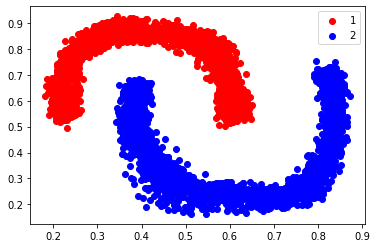

In [22]:
data1_graph = plt.scatter(x=data1['x'], y=data1['y'].where(data1['class'] == "Class 1"), color = "red", label = "1")
data1_graph = plt.scatter(x=data1['x'], y=data1['y'].where(data1['class'] == "Class 2"), color = "blue", label = "2")
plt.legend()
plt.show()

# Understanding Data set 2

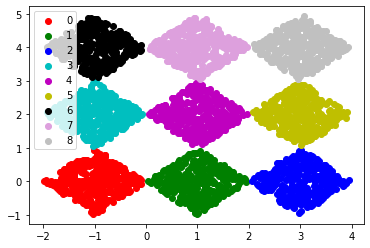

In [33]:
clrs=['r','g','b','c','m','y','k', 'plum', 'silver', 'pink']
for c in range(0,9):
    data2_graph = plt.scatter(x=data2['x'], y=data2['y'].where(data2['class'] == c), color = clrs[c], label = str(c))

plt.legend()
plt.show()

# Understanding Data set 3

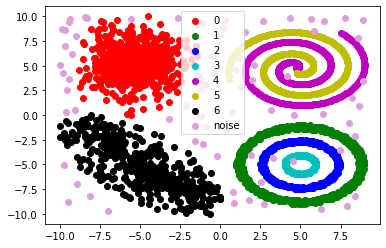

In [51]:
clrs=['r','g','b','c','m','y','k', 'plum', 'silver', 'pink']
i=0
for c in ['0','1','2','3','4','5','6',"noise"]:
    data3_graph = plt.scatter(x=data3['x'], y=data3['y'].where(data3['class'] == c), color = clrs[i], label = str(c))
    i = i+1

plt.legend()
plt.show()

# Understanding Data set 4

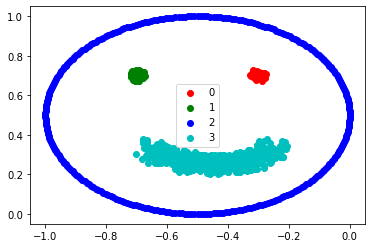

In [57]:
clrs=['r','g','b','c','m','y','k', 'plum', 'silver', 'pink']
for c in range(4):
    data4_graph = plt.scatter(x=data4['x'], y=data4['y'].where(data4['class'] == c), color = clrs[c], label = str(c))

plt.legend()
plt.show()

# Understanding Data set 5

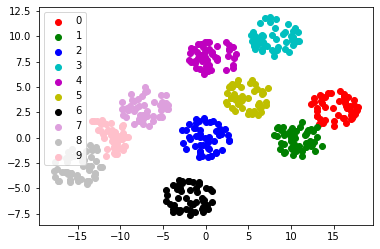

In [58]:
clrs=['r','g','b','c','m','y','k', 'plum', 'silver', 'pink']
for c in range(10):
    data5_graph = plt.scatter(x=data5['x'], y=data5['y'].where(data5['class'] == c), color = clrs[c], label = str(c))

plt.legend()
plt.show()

# Understanding Data set 6

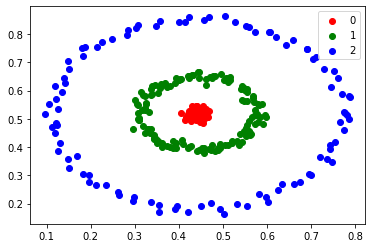

In [59]:
clrs=['r','g','b','c','m','y','k', 'plum', 'silver', 'pink']
for c in range(3):
    data6_graph = plt.scatter(x=data6['x'], y=data6['y'].where(data6['class'] == c), color = clrs[c], label = str(c))

plt.legend()
plt.show()

# Writing a function to perform K-means clustering

In [ ]:
def k_means_clustering(path, k):
    data = pd.read_csv(path)
    data = data[['x', 'y']]
    k_means = (data.sample(k, replace=False))
    k_means2 = pd.DataFrame()
    clusters = pd.DataFrame()
    #print('Initial means:\n', k_means)

    while not k_means2.equals(k_means):

        # distance matrix
        cluster_count = 0
        for idx, k_mean in k_means.iterrows():
            clusters[cluster_count] = (data[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
            cluster_count += 1

        # update cluster
        data['MDCluster'] = clusters.idxmin(axis=1)

        # store previous cluster
        k_means2 = k_means
        k_means = pd.DataFrame()
        k_means_frame = data.groupby('MDCluster').agg(np.mean)

        k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]

        
    # plotting
    data_graph = [plt.scatter(
        x=data['x'],
        y=data['y'].where(data['MDCluster'] == c),
        color = clrs[c],
        label ='Cluster: ' + str(c)
    ) for c in range(k)]

    data_graph.append(
        plt.scatter(
            x=k_means['x'],
            y=k_means['y'],
            color = 'k',
            #size = 10,
            label='Centroids of Clusters'
        )
    )
    plt.legend()
    plt.show()
    
# inspired by: https://github.com/karankharecha/Big_Data_Algorithms/blob/master/src/k_means_clustering.py

# The K-means plots

In [79]:
sets = [("dataset1.csv", 2), ("dataset2.csv", 9), ("dataset3.csv", 6), ("dataset3.csv", 7),
       ("dataset4.csv", 4), ("dataset5.csv", 10), ("dataset6.csv", 3)]

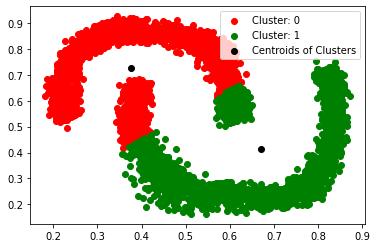

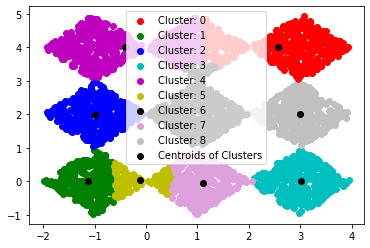

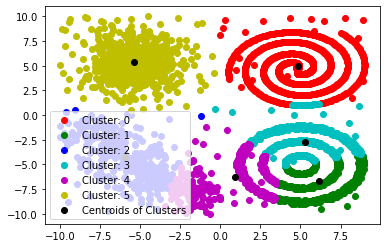

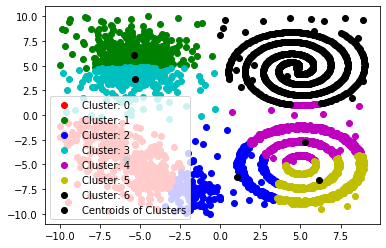

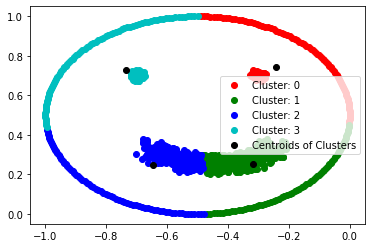

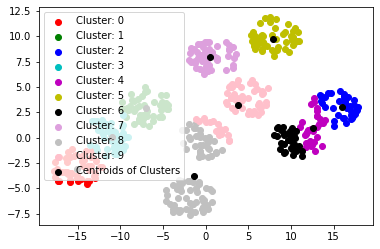

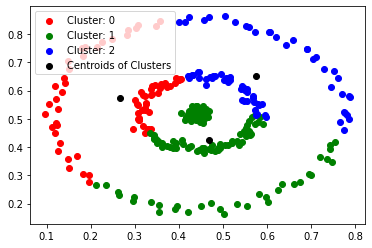

In [81]:
for set in sets:
    k_means_clustering(*set)

# The "flaw"

K-means clustering "groups" points that are "closest" to the centroid, hence it isn't surprising to see it providing fair results when there are no outliers and the clusters are "intact" but it fails in cases with "intertwining clusters"

Possible solution: using DBSCAN(density based approach) for clusters where K-means(distance based approach) fails